## MaskR-CNN object detection

In [51]:
import os.path

import cv2
import numpy as np
import requests
import torchvision
import torchvision.transforms as transforms

from pathlib import PosixPath

In [52]:
class_names = PosixPath("../data/coco.names")
assert class_names.is_file()

In [59]:
classes = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack',
    'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
    'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']

##  load the pytorch model

In [4]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /Users/ZRC/.cache/torch/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


In [6]:
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
    

In [134]:
image_name = "WechatIMG338.jpeg"
transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
img = cv2.imread(image_name)
nn_input = transform(img)
output = model([nn_input])

In [135]:
mask = output[0]['masks'].detach().numpy()

In [132]:
# iterate over the network output for all boxes
for mask,box_class, box, score in zip(output[0]['masks'].detach().numpy(),
                            output[0]['labels'].detach().numpy(),
                            output[0]['boxes'].detach().numpy(),
                            output[0]['scores'].detach().numpy()):

    # filter the boxes by score
    if score > 0.6 and classes[box_class] == "cat" or classes[box_class] == "dog":
        # transform bounding box format
        box = [(box[0], box[1]), (box[2], box[3])]

        # overlay the segmentation mask on the image with random color
        img[(mask > 0.9).squeeze(), :] = np.random.uniform(0, 255, size=3)

        
        # draw the bounding box

        cv2.rectangle(img=img,
                      pt1=box[0],
                      pt2=box[1],
                      color=(255, 255, 255),
                      thickness=2)

        # display the box class label
        cv2.putText(img=img,
                    text=classes[box_class],
                    org=box[0],
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=1,
                    color=(255, 255, 255),
                    thickness=2)

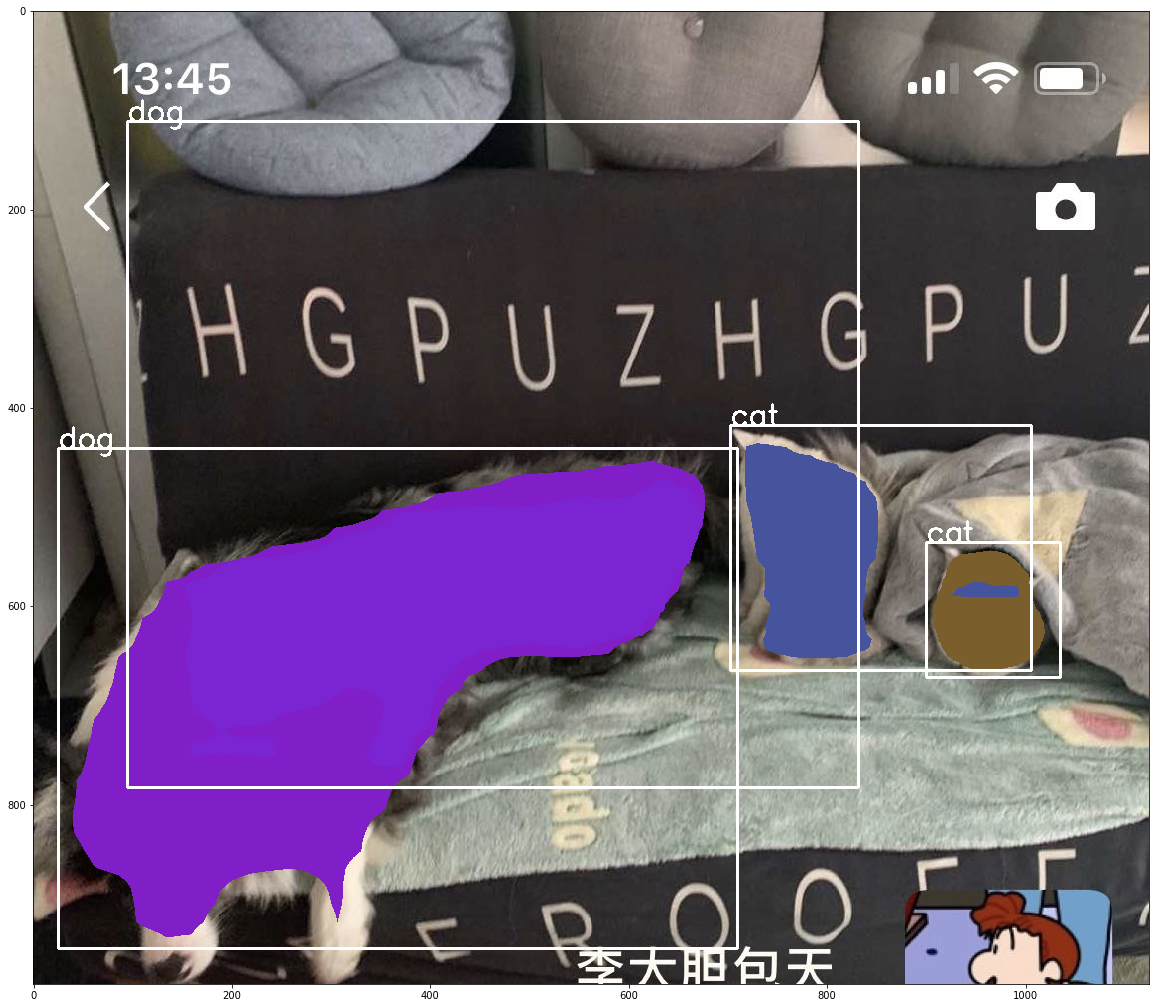

In [133]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))